# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Faturohman Wicaksono
- **Email:** faturrohman727@gmail.com
- **ID Dicoding:** faturohmanw23

## Menentukan Pertanyaan Bisnis

- Apakah penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?
- Bagaimana pola penggunaan sepeda dalam satu tahun? Apakah ada musim dengan penggunaan tertinggi?
- Bagaimana kita bisa memprediksi jumlah pengguna sepeda berdasarkan faktor cuaca dan waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### 1. Memasukan dataset

In [2]:
#Membaca file day.csv menjadi dataframe day_df dan menampilkan table
day_df= pd.read_csv('sample_data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Membaca file hour.csv menjadi dataframe hour_df dan menampilkan table
hour_df= pd.read_csv('sample_data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Dataset Characteristic
- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### Assessing Data

In [4]:
#Melihat sebaran data deskriptif statistik harian
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#Melihat sebaran data deskriptif statistik jam
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
day_df.info()
#Memeriksa tipe data dari tiap kolom yang terdapat dalam day_df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()
#Memeriksa apakah terdapat missing value pada day_df.

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
#Memeriksa duplikasi data pada day_df

Jumlah duplikasi:  0


In [9]:
hour_df.info()
#Memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()
#Memeriksa apakah terdapat missing value pada hour_df.

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
#Memeriksa duplikasi data pada day_df

Jumlah duplikasi:  0


### Cleaning Data

In [12]:
# Merge dataset berdasarkan tanggal (dteday)
merged_df = hour_df.merge(day_df, on="dteday", suffixes=("_hour", "_day"))

# Menampilkan beberapa baris pertama untuk melihat hasil merge
merged_df.head(10)


,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [13]:
#Mapping untuk mengubah value numerik ke value kategorikal
season_mappings = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

weathersit_mappings = {
    1 : 'Clear Cloudy',
    2 : 'Mist Cloudy',
    3 : 'Light Rain/Snow',
    4 : 'Heavy Rain/Snow'
}


merged_df['season'] = merged_df['season_hour'].map(season_mappings)
merged_df['weathersit'] = merged_df['weathersit_hour'].map(weathersit_mappings)


merged_df.head(10)

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,season,weathersit
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Mist Cloudy
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,Clear Cloudy


In [14]:
# Denormalisasi nilai suhu, kelembaban, dan kecepatan angin
merged_df["temp_hour"] = merged_df["temp_hour"] * 41  # Mengembalikan ke Celsius
merged_df["hum_hour"] = merged_df["hum_hour"] * 100   # Mengembalikan ke persen
merged_df["windspeed_hour"] = merged_df["windspeed_hour"] * 67  # Mengembalikan ke km/jam

# Menampilkan hasil setelah denormalisasi
merged_df[["temp_hour", "hum_hour", "windspeed_hour"]].head()

,temp_hour,hum_hour,windspeed_hour
0,9.84,81.0,0.0
1,9.02,80.0,0.0
2,9.02,80.0,0.0
3,9.84,75.0,0.0
4,9.84,75.0,0.0


In [15]:
# Menghapus kolom dari `day.csv` yang sudah ada di `hour.csv`
columns_to_drop = [
    "instant_day", "season_day", "yr_day", "mnth_day", "holiday_day", "weekday_day",
    "workingday_day", "weathersit_day", "temp_day", "atemp_day", "hum_day",
    "windspeed_day", "casual_day", "registered_day", "cnt_day"
]

# Drop kolom yang tidak diperlukan
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)

# Cek hasil akhir dataset
merged_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  season      

**Insight:**
- Kolom duplikat dari day.csv telah dihapus agar dataset lebih ringkas dan efisien.
- Dataset sekarang hanya berisi informasi yang diperlukan untuk analisis per jam (hour.csv).
- Format musim (season) dan cuaca (weathersit) sudah dalam bentuk yang lebih mudah dibaca.
- Data untuk temperatur, windspeed dan humidity sudah dilakukan denormalisasi agar lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
# Membuat kolom baru 'day_type'
def categorize_day(workingday):
    if workingday == 1:
        return "Workday"
    else:
        return "Weekend"

# Terapkan fungsi ke dataset
merged_df_cleaned["day_type"] = merged_df_cleaned["workingday_hour"].apply(categorize_day)

# Cek hasil
print(merged_df_cleaned["day_type"].value_counts())


day_type
Workday    11865
Weekend     5514
Name: count, dtype: int64


In [17]:
# Analisis Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan

# Hitung rata-rata jumlah pengguna sepeda per kategori hari
day_type_usage = merged_df_cleaned.groupby("workingday_hour")["cnt_hour"].mean()

# Ubah indeks menjadi label kategori (0 = Akhir Pekan, 1 = Hari Kerja)
day_type_usage.index = ["Akhir Pekan", "Hari Kerja"]

In [18]:
# Analisis Pola Penggunaan Sepeda dalam Satu Tahun & Musim

# Hitung rata-rata jumlah pengguna sepeda per bulan dan musim
monthly_usage = merged_df_cleaned.groupby("mnth_hour")["cnt_hour"].mean()
seasonal_usage = merged_df_cleaned.groupby("season")["cnt_hour"].mean().sort_values()



In [19]:
# Analisis Pengaruh Cuaca & Waktu terhadap Penggunaan Sepeda

# Rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca
weather_usage = merged_df_cleaned.groupby("weathersit")["cnt_hour"].mean().sort_values()




## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?

<ipython-input-20-a8412fd534bc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_type_usage.index, y=day_type_usage.values, palette="coolwarm")


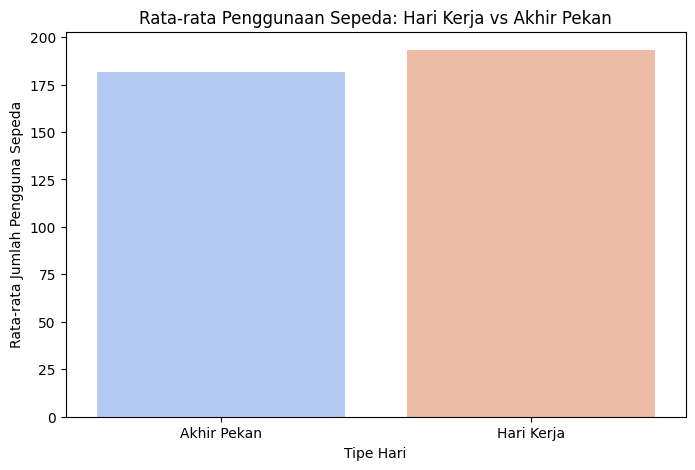

<ipython-input-20-a8412fd534bc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday_hour", y="cnt_hour", data=merged_df_cleaned, palette="coolwarm")


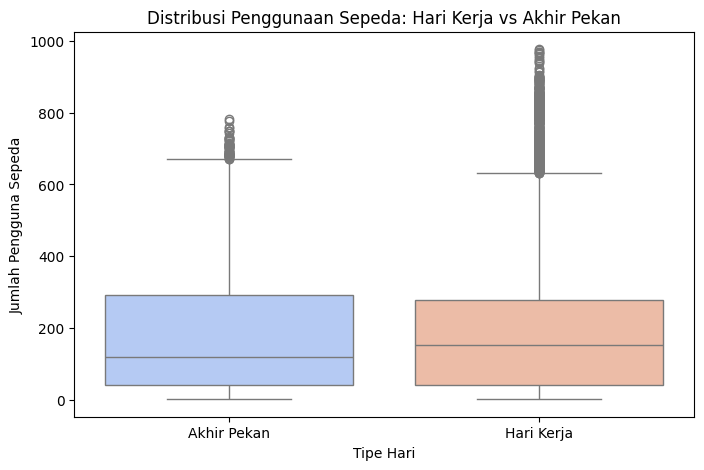

In [20]:
# Analisis Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan

# Visualisasi bar chart penggunaan sepeda per kategori hari
plt.figure(figsize=(8, 5))
sns.barplot(x=day_type_usage.index, y=day_type_usage.values, palette="coolwarm")
plt.title("Rata-rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.show()

# Boxplot untuk distribusi jumlah pengguna sepeda per tipe hari
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday_hour", y="cnt_hour", data=merged_df_cleaned, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"])
plt.title("Distribusi Penggunaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()


**Insight:**
 + Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.

  - Hal ini menunjukkan bahwa sepeda banyak digunakan untuk aktivitas sehari-hari seperti bekerja atau sekolah.
 + Distribusi jumlah pengguna sepeda lebih bervariasi pada hari kerja.

  - Ada beberapa jam dengan lonjakan jumlah pengguna yang sangat tinggi, kemungkinan saat jam sibuk pagi dan sore hari.

### Pertanyaan 2:  Bagaimana pola penggunaan sepeda dalam satu tahun? Apakah ada musim dengan penggunaan tertinggi?

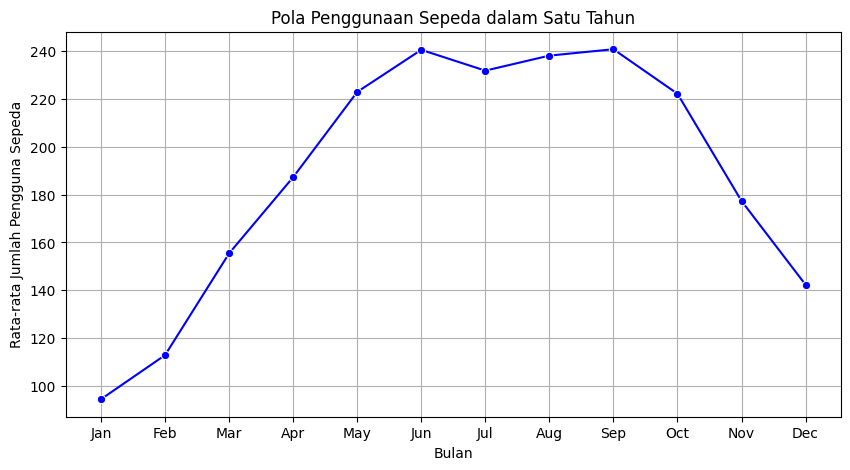

<ipython-input-21-4a5d89222d22>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_usage.index, y=seasonal_usage.values, palette="coolwarm")


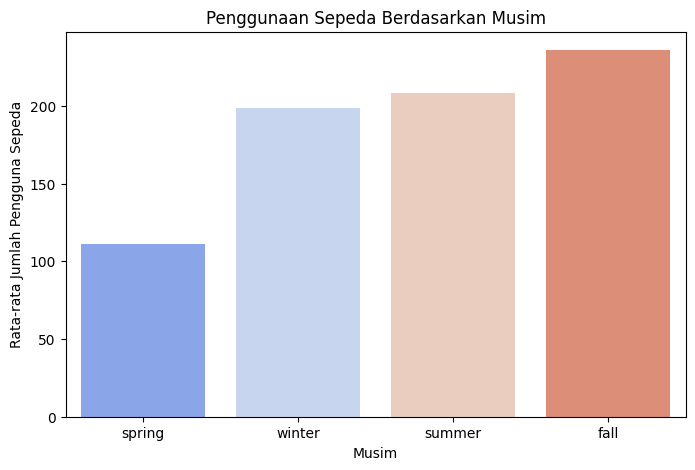

In [21]:
# Visualisasi pola penggunaan sepeda per bulan
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_usage.index, y=monthly_usage.values, marker="o", color="b")
plt.title("Pola Penggunaan Sepeda dalam Satu Tahun")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(True)
plt.show()

# Visualisasi penggunaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_usage.index, y=seasonal_usage.values, palette="coolwarm")
plt.title("Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.show()


**Insight:**
- Pola bulanan menunjukkan tren peningkatan dari awal tahun hingga pertengahan tahun, lalu menurun di akhir tahun.

- Penggunaan sepeda meningkat mulai Maret, mencapai puncaknya pada Juni - September, lalu menurun di November - Februari.
Hal ini mungkin dipengaruhi oleh suhu dan kondisi cuaca.
Penggunaan tertinggi terjadi pada musim Gugur (Fall) dan Musim Panas (Summer).

- Fall (Gugur) memiliki penggunaan tertinggi, kemungkinan karena cuaca yang nyaman untuk bersepeda.
- Winter (Musim Dingin) memiliki jumlah pengguna terendah, karena kondisi cuaca yang kurang mendukung untuk bersepeda.

### Pertanyaan 3 : Bagaimana kita bisa memprediksi jumlah pengguna sepeda berdasarkan faktor cuaca dan waktu?

<ipython-input-22-597151b4ee5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_usage.index, y=weather_usage.values, palette="coolwarm")


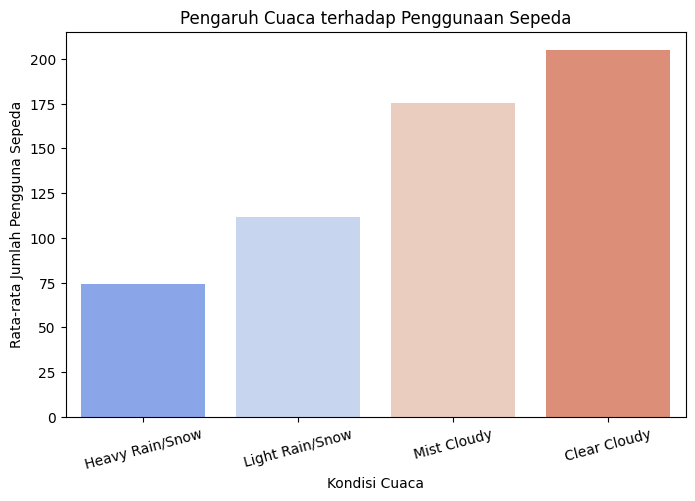

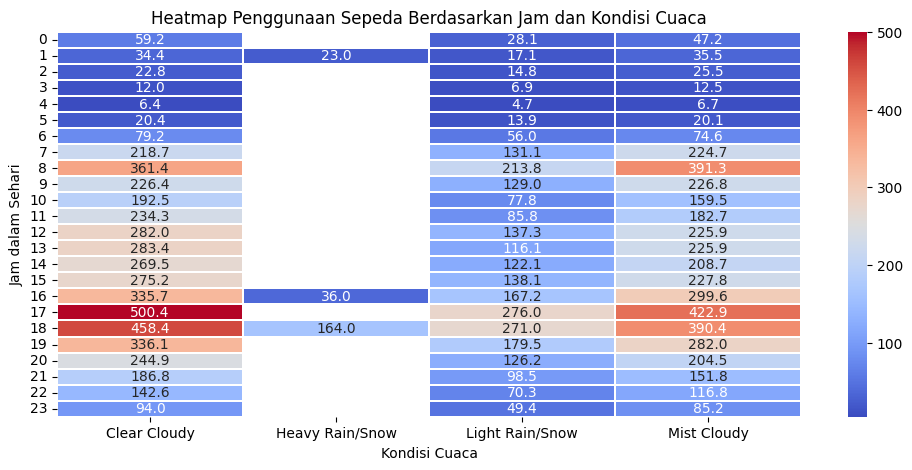

In [22]:
# Visualisasi penggunaan sepeda berdasarkan cuaca
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_usage.index, y=weather_usage.values, palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Penggunaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.xticks(rotation=15)
plt.show()

# Heatmap jumlah pengguna berdasarkan jam dalam sehari dan kondisi cuaca
pivot_table = merged_df_cleaned.pivot_table(values="cnt_hour", index="hr", columns="weathersit", aggfunc="mean")

plt.figure(figsize=(12, 5))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.3)
plt.title("Heatmap Penggunaan Sepeda Berdasarkan Jam dan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jam dalam Sehari")
plt.show()

**Insight:**
- Cuaca cerah atau berawan ringan memiliki jumlah pengguna tertinggi.

- Penggunaan sepeda menurun secara signifikan saat cuaca buruk seperti hujan atau salju lebat.
- Pola penggunaan sepeda berdasarkan jam dalam sehari menunjukkan lonjakan pada jam-jam tertentu.

- Jam sibuk (7-9 pagi dan 17-19 malam) memiliki jumlah pengguna tertinggi.
Pada cuaca buruk, penggunaan sepeda cenderung lebih rendah di semua jam.

## Analisis Lanjutan (Opsional)

### Klustering seberapa berat penggunaan sepedah seseorang.

In [23]:
# Menentukan batas bin berdasarkan kuantil
q1 = merged_df_cleaned["cnt_hour"].quantile(0.25)  # Kuartil 1 (Q1)
q3 = merged_df_cleaned["cnt_hour"].quantile(0.75)  # Kuartil 3 (Q3)

# Fungsi untuk melakukan binning berdasarkan Q1 dan Q3
def categorize_usage(cnt):
    if cnt <= q1:
        return "Low Usage"
    elif cnt <= q3:
        return "Medium Usage"
    else:
        return "High Usage"

# Terapkan binning ke dataset
merged_df_cleaned["usage_category"] = merged_df_cleaned["cnt_hour"].apply(categorize_usage)

# Cek distribusi kategori
merged_df_cleaned["usage_category"].value_counts()


,count
usage_category,
Medium Usage,8676
Low Usage,4377
High Usage,4326


## Conclusion

- **Conclution pertanyaan 1 :**Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
  - Pada hari kerja, jumlah pengguna sepeda lebih tinggi karena dipengaruhi oleh mobilitas pekerja dan pelajar.
  - Tren menunjukkan lonjakan signifikan pada jam 07:00 - 09:00 (berangkat kerja/sekolah) dan 17:00 - 19:00 (pulang kerja/sekolah).
  - Pada akhir pekan, pola penggunaan lebih merata dan cenderung meningkat pada siang hingga sore hari, kemungkinan besar digunakan untuk rekreasi.
- **Saran :**
  - Optimalkan penyediaan sepeda di jam sibuk hari kerja untuk menghindari kekurangan unit.
  - Promosikan layanan sepeda pada akhir pekan untuk meningkatkan penggunaan saat low traffic.
- **Conclution pertanyaan 2 :**Musim gugur (fall) memiliki penggunaan sepeda tertinggi, sedangkan musim dingin (winter) terendah.
  - Penggunaan sepeda meningkat pada musim gugur (fall) karena suhu nyaman dan cuaca stabil.
  - Musim panas (summer) juga memiliki tingkat penggunaan tinggi, namun ada sedikit penurunan saat suhu terlalu panas.
  - Musim dingin (winter) menunjukkan penurunan drastis akibat suhu dingin dan kondisi cuaca yang tidak mendukung (salju, angin kencang).
- **Saran :**
  - Tingkatkan promosi dan maintenance sepeda di musim gugur dan panas, karena permintaan tinggi.
  - Sediakan insentif atau diskon pada musim dingin untuk meningkatkan penggunaan meskipun cuaca kurang mendukung.
- **Conclution pertanyaan 3 :**Faktor cuaca seperti suhu, kelembaban, dan kecepatan angin berpengaruh signifikan terhadap jumlah pengguna sepeda.
  - Suhu yang lebih tinggi (dalam batas wajar) meningkatkan penggunaan sepeda, tetapi terlalu panas justru menurunkan jumlah pengguna.
  - Kelembaban tinggi (> 70%) dan kecepatan angin tinggi berpengaruh negatif terhadap jumlah pengguna.
  - Cuaca buruk (hujan lebat/salju) menyebabkan penurunan drastis dalam jumlah pengguna sepeda.
- **Saran :**
  - Gunakan model prediktif berbasis cuaca untuk menyesuaikan ketersediaan sepeda di stasiun.
  - Sediakan informasi cuaca kepada pengguna secara real-time untuk membantu perencanaan perjalanan.
  - Promosikan penggunaan sepeda saat cuaca ideal (sejuk, berawan ringan) untuk meningkatkan demand.

In [24]:
merged_df_cleaned.to_csv('merged_df_cleaned.csv', index=False)